In [46]:
#IMDB
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from keras.datasets import imdb
from tensorflow.keras import preprocessing

In [47]:
max_features = 20000
maxlen = 50 #maximum length of a sequence. Longer sequence will be truncated

In [48]:
#splitting the data into train and test
#num_words contains the number of most frequent words to be considered. In this case, it will be 20000
(train_data, train_labels), (x_test, y_test) = imdb.load_data(num_words=
max_features)

In [49]:
#print the shape of the train and test variables
print(train_data.shape)
print(train_labels.shape)
print(x_test.shape)
print(y_test.shape)

(25000,)
(25000,)
(25000,)
(25000,)


In [50]:
#splitting training data into training and validation
x_val = train_data[:5000]
x_train = train_data[5000:]
y_val = train_labels[:5000]
y_train = train_labels[5000:]

In [51]:
#print the shape of the train and validation variables
print(x_train.shape)
print(y_train.shape)
print(x_val.shape)
print(y_val.shape)

(20000,)
(20000,)
(5000,)
(5000,)


In [52]:
#truncating or padding sequences in the dataset to a length of 50
x_train = preprocessing.sequence.pad_sequences(x_train, maxlen=maxlen)
x_val = preprocessing.sequence.pad_sequences(x_val, maxlen=maxlen)
x_test = preprocessing.sequence.pad_sequences(x_test, maxlen=maxlen)

In [53]:
#import function from keras for creating NN model
from keras.models import Sequential
from keras.layers import Dense, Flatten, SimpleRNN, LSTM
from keras.layers.embeddings import Embedding
from keras.optimizers import SGD


In [64]:
#Embedding layer - to convert each word into a fixed length vector
sc_model = Sequential()
sc_model.add(Embedding(max_features, 128, input_length = maxlen))
#sc_model.add(Flatten())
#sc_model.add(Dense(500, activation = 'relu'))
#sc_model.add(SimpleRNN(250, activation = 'relu'))
sc_model.add(SimpleRNN(128, activation = 'relu'))
sc_model.add(Dense(1, activation = 'sigmoid'))
#defining learning rate for stochastic gradient descent
#sgd = SGD(lr = 0.01)
#compiling the model
#sc_model.compile(optimizer = sgd, loss='binary_crossentropy', metrics = ['accuracy'])
sc_model.compile(optimizer = 'Adam', loss='binary_crossentropy', metrics = ['accuracy'])

sc_model.summary()


Model: "sequential_11"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_11 (Embedding)     (None, 50, 128)           2560000   
_________________________________________________________________
simple_rnn_4 (SimpleRNN)     (None, 128)               32896     
_________________________________________________________________
dense_11 (Dense)             (None, 1)                 129       
Total params: 2,593,025
Trainable params: 2,593,025
Non-trainable params: 0
_________________________________________________________________


In [65]:
#fitting and evaluating the model
training_hist = sc_model.fit(x_train, y_train, batch_size=100, epochs = 10, verbose = 2, validation_data = (x_val, y_val))

Train on 20000 samples, validate on 5000 samples
Epoch 1/10
 - 12s - loss: 0.5484 - acc: 0.7016 - val_loss: 0.4818 - val_acc: 0.7692
Epoch 2/10
 - 11s - loss: 0.3236 - acc: 0.8618 - val_loss: 0.4591 - val_acc: 0.7948
Epoch 3/10
 - 12s - loss: 0.2151 - acc: 0.9139 - val_loss: 0.5181 - val_acc: 0.8010
Epoch 4/10
 - 13s - loss: 0.1309 - acc: 0.9516 - val_loss: 0.5484 - val_acc: 0.7866
Epoch 5/10
 - 12s - loss: 0.1238 - acc: 0.9551 - val_loss: 0.8038 - val_acc: 0.7862
Epoch 6/10
 - 13s - loss: 0.0710 - acc: 0.9755 - val_loss: 0.8488 - val_acc: 0.7820
Epoch 7/10
 - 11s - loss: 0.0474 - acc: 0.9842 - val_loss: 0.9252 - val_acc: 0.7840
Epoch 8/10
 - 10s - loss: 0.0508 - acc: 0.9823 - val_loss: 0.8560 - val_acc: 0.7816
Epoch 9/10
 - 10s - loss: 0.0293 - acc: 0.9901 - val_loss: 1.1164 - val_acc: 0.7880
Epoch 10/10
 - 10s - loss: 0.0323 - acc: 0.9904 - val_loss: 1.0063 - val_acc: 0.7820


Text(0, 0.5, 'loss')

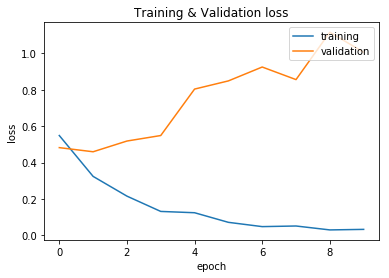

In [66]:
import matplotlib.pyplot as plt
#Plot training and validation loss
plt.plot(training_hist.history['loss'])
plt.plot(training_hist.history['val_loss'])
plt.title('Training & Validation loss')
plt.legend(['training', 'validation'], loc='upper right')
plt.xlabel('epoch')
plt.ylabel('loss')

Text(0, 0.5, 'accuracy')

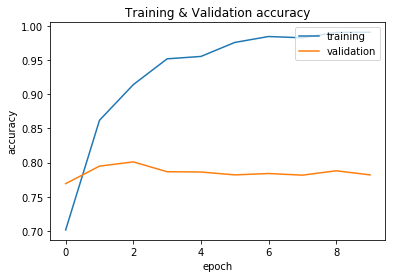

In [105]:
#Plot training and validation loss
plt.plot(training_hist.history['acc'])
plt.plot(training_hist.history['val_acc'])
plt.title('Training & Validation accuracy')
plt.legend(['training', 'validation'], loc='upper right')
plt.xlabel('epoch')
plt.ylabel('accuracy')

In [67]:
loss_accuracy_score1 = sc_model.evaluate(x_test, y_test)
print("Loss ", loss_accuracy_score1[0] )
print("Accuracy score:",loss_accuracy_score1[1])

25000/25000 [==============================] - 4s 150us/step
Loss  1.0091726932430267
Accuracy score: 0.78272


In [68]:
#Embedding layer - to convert each word into a fixed length vector
sc_model2 = Sequential()
sc_model2.add(Embedding(max_features, 128, input_length = maxlen))
#sc_model.add(Flatten())
#sc_model.add(Dense(500, activation = 'relu'))

#training model using LSTM layer
#sc_model2.add(LSTM(250, activation = 'tanh'))
sc_model2.add(LSTM(128, activation = 'tanh', dropout = 0.3, recurrent_dropout = 0.3))
sc_model2.add(Dense(1, activation = 'sigmoid'))
#defining learning rate for stochastic gradient descent
#sgd = SGD(lr = 0.01)
#compiling the model
#sc_model2.compile(optimizer = sgd, loss='binary_crossentropy', metrics = ['accuracy'])
sc_model2.compile(optimizer = 'Adam', loss='binary_crossentropy', metrics = ['accuracy'])
sc_model2.summary()

Model: "sequential_12"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_12 (Embedding)     (None, 50, 128)           2560000   
_________________________________________________________________
lstm_8 (LSTM)                (None, 128)               131584    
_________________________________________________________________
dense_12 (Dense)             (None, 1)                 129       
Total params: 2,691,713
Trainable params: 2,691,713
Non-trainable params: 0
_________________________________________________________________


In [69]:
#fitting and evaluating the model
training_hist2 = sc_model2.fit(x_train, y_train, batch_size=100, epochs = 10, verbose = 2, validation_data = (x_val, y_val))

Train on 20000 samples, validate on 5000 samples
Epoch 1/10
 - 31s - loss: 0.5257 - acc: 0.7298 - val_loss: 0.4163 - val_acc: 0.8126
Epoch 2/10
 - 28s - loss: 0.3392 - acc: 0.8562 - val_loss: 0.4358 - val_acc: 0.8050
Epoch 3/10
 - 32s - loss: 0.2607 - acc: 0.8943 - val_loss: 0.4712 - val_acc: 0.8022
Epoch 4/10
 - 29s - loss: 0.2007 - acc: 0.9246 - val_loss: 0.5160 - val_acc: 0.8006
Epoch 5/10
 - 29s - loss: 0.1549 - acc: 0.9437 - val_loss: 0.5922 - val_acc: 0.7920
Epoch 6/10
 - 28s - loss: 0.1175 - acc: 0.9585 - val_loss: 0.6820 - val_acc: 0.7870
Epoch 7/10
 - 28s - loss: 0.0898 - acc: 0.9698 - val_loss: 0.7510 - val_acc: 0.7876
Epoch 8/10
 - 30s - loss: 0.0722 - acc: 0.9759 - val_loss: 0.9362 - val_acc: 0.7864
Epoch 9/10
 - 29s - loss: 0.0615 - acc: 0.9798 - val_loss: 0.8468 - val_acc: 0.7866
Epoch 10/10
 - 31s - loss: 0.0477 - acc: 0.9835 - val_loss: 0.8928 - val_acc: 0.7850


Text(0, 0.5, 'loss')

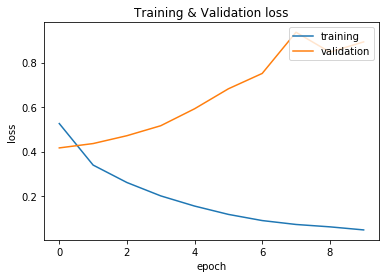

In [70]:
#Plot training and validation loss
plt.plot(training_hist2.history['loss'])
plt.plot(training_hist2.history['val_loss'])
plt.title('Training & Validation loss')
plt.legend(['training', 'validation'], loc='upper right')
plt.xlabel('epoch')
plt.ylabel('loss')

Text(0, 0.5, 'accuracy')

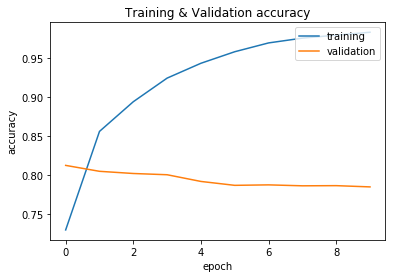

In [106]:
#plotting training and validation accuracy
plt.plot(training_hist2.history['acc'])
plt.plot(training_hist2.history['val_acc'])
plt.title('Training & Validation accuracy')
plt.legend(['training', 'validation'], loc='upper right')
plt.xlabel('epoch')
plt.ylabel('accuracy')

In [71]:
#Accuracy score for LSTM model
loss_accuracy_score2 = sc_model2.evaluate(x_test, y_test)#, batch_size=100, verbose=2)
print("Loss ", loss_accuracy_score2[0] )
print("Accuracy score:",loss_accuracy_score2[1])

25000/25000 [==============================] - 9s 370us/step
Loss  0.8863036435127258
Accuracy score: 0.77816


After comparing the results of both the models(i.e. one using SimpleRNN and one using LSTM), I found that the training accuracy of SimpleRNN model was really good i.e. above 95% but its test accuracy was lower than training i.e. below 80%. The training accuracy of LSTM model was slightly lesser than SimpleRNN but it performed similarly on test data as compared to SimpleRNN model.